# Gyak 14 Deep Reinforcement Learning

A gyakorlat célja a Deep Reinforcement Learning esetében alkalmazott tanítási framwork megismertetése a Markov Decision Process, valamint az OpenAI Gym környezetek bemutatásával.


A gyakorlat során egy alap Reinforcement Learning algoritmus kerül bemutatásra, a Q-learning.  Ezen algoritmus implementálás során a RL fő elemei is bemutatásra kerülenk, mint az episode, a reward, a state és az action. 

A gyakorlat második részében a Reinforcement Learning-et ötvözzük a Deep Learninggel így megkapjuk a Deep Reinorcement Learninget, ahol egy mély neurális háló approximátor szerepet tölt be. A háló paramétereit úg tanítjuk, hogy egy ideális stratégiát tanuljanak meg a kitűzött feladat megoldásához. A DRL részben a Deep Q-learning Network (DQN) metódust ismerjük meg.

## Q learning - CliffWalking

In [ ]:
# importok és a környezet betöltése (OpenAI gym környezetet használunk)
import gym
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
env = gym.make("CliffWalking-v0")
n_state = env.observation_space.n
n_action = env.action_space.n
print(n_state)
print(n_action)

env.reset()

env.render()

48
4
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [ ]:
# manuális léptetés a környezetben

new_state, reward, is_done, info = env.step(1)
env.render()
print("reward: ",reward)
print("Are we there yet? ",is_done)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

reward:  -100
Are we there yet?  False


In [ ]:
new_state

33

In [ ]:
# definiáljuk a policy/stratégia függvényt: eplsilon-greedy policy
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        
        #print(" \n Q [State % 2d]: " %(state), Q[state] )
        best_action = torch.argmax(Q[state]).item()
        #print("best_action ", best_action)
        #print("probs ", probs)
        probs[best_action] += 1.0 - epsilon
        #print("probs ", probs)
        action = torch.multinomial(probs, 1).item()
        #print("action \n ", action)
        return action
    return policy_function

In [ ]:
# Definiáljuk a q függvényt, amely létrehoz nekünk egy listát az összes lehetséges 
# szituációval (state) és minden szituációhoz hozzáreneli az összes lépés lehetőségét.
# A feladat, hogy maximalizáljuk adok statekre az actiont a tapasztalataink
# alapján, amit a jutalom (reward) definiál. 
def q_learning(env, gamma, n_episode, alpha):
    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        #print("Episode====================== \n \n", episode)
        while not is_done:
            action = epsilon_greedy_policy(state, Q)
            next_state, reward, is_done, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
            #print("td_delta", td_delta) 
            Q[state][action] += alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = next_state
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [ ]:
# hyperparaméterek beaáálítása

# discount factor
gamma = 1


n_episode = 1

#learning rate
alpha = 0.4

#greedy treshold
epsilon = 0.1

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [ ]:
# policy inicializálás
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [ ]:
#tanítás
optimal_Q, optimal_policy = q_learning(env, gamma, n_episode,alpha)

Episode====================== 
 
 0


In [ ]:
# nézzük meg, hogyan alakult a Q(s,a) könyvtárunk.
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>>,
            {0: tensor([-1.6000, -1.6608, -1.3920, -1.2000]),
             1: tensor([-1.6000, -1.6864, -1.5360, -1.4560]),
             2: tensor([-1.6000, -1.6608, -1.4016, -1.4560]),
             3: tensor([-1.2000, -1.4016, -1.2000, -1.4304]),
             4: tensor([-1.2000, -1.2000, -0.9440, -0.9600]),
             5: tensor([-1.2000, -1.2000, -0.8000, -0.8000]),
             6: tensor([-1.2000, -1.2000, -0.8000, -0.8000]),
             7: tensor([-0.8000, -0.8000, -1.0400, -0.8000]),
             8: tensor([-0.8000, -0.8000, -0.8000, -0.8000]),
             9: tensor([-0.8000, -0.8000, -0.8000, -0.8000]),
             10: tensor([-0.8000, -0.8000, -0.8000, -0.8000]),
             11: tensor([-0.8000, -0.6400, -0.6400, -0.8000]),
             12: tensor([-1.5878, -1.6726, -1.5410, -1.6000]),
             13: tensor([-1.6576, -1.3440, -1.5114, -1.4560]),
             14: tensor([-1.5744, -1.1904, -1.2576, -0.9600]),
   

In [ ]:
# az optimális döntés pozíciónként. 
optimal_policy

{0: 3,
 1: 0,
 2: 3,
 3: 0,
 4: 3,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 2,
 10: 2,
 11: 2,
 12: 3,
 13: 0,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 2,
 36: 0,
 47: 0}

In [ ]:
max(total_reward_episode)

-13

In [ ]:

plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

In [ ]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

## Q-Learning Taxi

In [ ]:
import gym
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
env = gym.make('Taxi-v3')
n_state = env.observation_space.n
n_action = env.action_space.n
print(n_state)
print(n_action)

env.reset()

env.render()


500
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
new_state, reward, is_done, info = env.step(4)
env.render()
print("current state", new_state)
print("reward: ", reward)
print("Are we there yet? ", is_done)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
current state 418
reward:  -1
Are we there yet?  False


In [ ]:
reward

-1

In [ ]:
n_episode = 3000
length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [ ]:
gamma = 1
alpha = 0.4
epsilon = 0.1
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [ ]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episode,
alpha)

Streaming output truncated to the last 5000 lines.
 
 1333
Episode====================== 
 
 1334
Episode====================== 
 
 1335
Episode====================== 
 
 1336
Episode====================== 
 
 1337
Episode====================== 
 
 1338
Episode====================== 
 
 1339
Episode====================== 
 
 1340
Episode====================== 
 
 1341
Episode====================== 
 
 1342
Episode====================== 
 
 1343
Episode====================== 
 
 1344
Episode====================== 
 
 1345
Episode====================== 
 
 1346
Episode====================== 
 
 1347
Episode====================== 
 
 1348
Episode====================== 
 
 1349
Episode====================== 
 
 1350
Episode====================== 
 
 1351
Episode====================== 
 
 1352
Episode====================== 
 
 1353
Episode====================== 
 
 1354
Episode====================== 
 
 1355
Episode====================== 
 
 1356
Episode====================== 
 
 1357
Episo

In [ ]:
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>>,
            {0: tensor([0., 0., 0., 0., 0., 0.]),
             1: tensor([ 7.0459,  8.8305,  7.8946,  9.3095, 11.0000,  0.6860]),
             2: tensor([ 7.1751, 13.6889,  9.7490, 11.7828, 15.0000,  3.8772]),
             3: tensor([ 9.8432,  7.0336,  7.0110,  9.7511, 12.0000,  1.3661]),
             4: tensor([ -8.8901,  -8.8456,   1.9632,  -8.8000, -11.3600, -10.8736]),
             6: tensor([  1.6651,  -9.2104,  -9.4397,  -9.2586, -14.5613, -10.9414]),
             7: tensor([  4.2396,  -7.5459,  -7.2067,  -7.6000, -10.5652, -10.8584]),
             8: tensor([ 10.4948,  -6.0000,  -6.2845,  -5.9840, -10.8736, -10.8698]),
             9: tensor([ 6.9960, -2.4127, -7.6709, -7.6000, -8.0000, -8.0000]),
             11: tensor([  7.8154,  -7.1492,  -7.2814,  -7.2000, -10.7200, -11.3397]),
             12: tensor([ -8.5732,  -4.7943,   4.9795,  -8.8000, -10.4409, -13.6439]),
             13: tensor([ -7.0943,  -7.1802,   6.6

In [ ]:
# nézzük meg, hogyan alakult a Q(s,a) könyvtárunk.
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>>,
            {0: tensor([0., 0., 0., 0., 0., 0.]),
             1: tensor([ 7.0459,  8.8305,  7.8946,  9.3095, 11.0000,  0.6860]),
             2: tensor([ 7.1751, 13.6889,  9.7490, 11.7828, 15.0000,  3.8772]),
             3: tensor([ 9.8432,  7.0336,  7.0110,  9.7511, 12.0000,  1.3661]),
             4: tensor([ -8.8901,  -8.8456,   1.9632,  -8.8000, -11.3600, -10.8736]),
             6: tensor([  1.6651,  -9.2104,  -9.4397,  -9.2586, -14.5613, -10.9414]),
             7: tensor([  4.2396,  -7.5459,  -7.2067,  -7.6000, -10.5652, -10.8584]),
             8: tensor([ 10.4948,  -6.0000,  -6.2845,  -5.9840, -10.8736, -10.8698]),
             9: tensor([ 6.9960, -2.4127, -7.6709, -7.6000, -8.0000, -8.0000]),
             11: tensor([  7.8154,  -7.1492,  -7.2814,  -7.2000, -10.7200, -11.3397]),
             12: tensor([ -8.5732,  -4.7943,   4.9795,  -8.8000, -10.4409, -13.6439]),
             13: tensor([ -7.0943,  -7.1802,   6.6

In [ ]:
# az optimális döntés pozíciónként. 
optimal_policy

{0: 0,
 1: 4,
 2: 4,
 3: 4,
 4: 2,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 11: 0,
 12: 2,
 13: 2,
 14: 0,
 16: 5,
 17: 2,
 18: 0,
 19: 0,
 21: 3,
 22: 3,
 23: 3,
 24: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 3,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 36: 3,
 37: 0,
 38: 0,
 39: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 2,
 46: 2,
 47: 2,
 48: 0,
 49: 0,
 51: 0,
 52: 2,
 53: 0,
 54: 0,
 56: 0,
 57: 2,
 58: 0,
 59: 1,
 61: 3,
 62: 0,
 63: 0,
 64: 2,
 66: 2,
 67: 2,
 68: 3,
 69: 0,
 71: 0,
 72: 0,
 73: 2,
 74: 0,
 76: 0,
 77: 2,
 78: 2,
 79: 2,
 81: 0,
 82: 3,
 83: 3,
 84: 4,
 85: 0,
 86: 4,
 87: 4,
 88: 0,
 89: 3,
 91: 3,
 92: 0,
 93: 0,
 94: 0,
 96: 0,
 97: 5,
 98: 0,
 99: 0,
 101: 1,
 102: 1,
 103: 1,
 104: 0,
 106: 2,
 107: 0,
 108: 0,
 109: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 2,
 116: 1,
 117: 0,
 118: 0,
 119: 2,
 121: 1,
 122: 3,
 123: 3,
 124: 0,
 126: 0,
 127: 0,
 128: 3,
 129: 0,
 131: 3,
 132: 0,
 133: 0,
 134: 0,
 136: 1,
 137: 0,
 138: 3,
 139: 0,
 141: 0,
 142: 0,
 143: 0,
 144: 2,
 146: 2,
 147: 1,
 148: 0,
 1

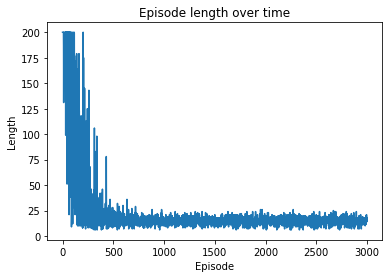

In [ ]:
plt.plot(length_episode)
plt.title('Episode length over time')

plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

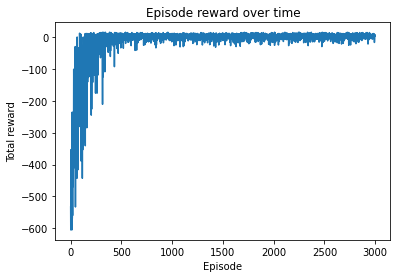

In [ ]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

In [ ]:
max(total_reward_episode)

15

## Sarsa CliffWalking & Taxi

In [ ]:
env = gym.make("CliffWalking-v0")
# env = gym.make('Taxi-v3')

n_episode = 1000
length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

In [ ]:
gamma = 1
alpha = 0.4
epsilon = 0.01

In [ ]:
def sarsa(env, gamma, n_episode, alpha):

    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        action = epsilon_greedy_policy(state, Q)
        while not is_done:
            next_state, reward, is_done, info = env.step(action)
            next_action = epsilon_greedy_policy(next_state, Q)
            td_delta = reward + gamma * Q[next_state][next_action] - Q[state][action]
            Q[state][action] += alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = next_state
            action = next_action
    policy = {}
    
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [ ]:
gamma = 1
alpha = 0.4
epsilon = 0.1

In [ ]:
epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [ ]:
optimal_Q, optimal_policy = sarsa(env, gamma, n_episode, alpha)

In [ ]:
optimal_Q

defaultdict(<function __main__.sarsa.<locals>.<lambda>>,
            {0: tensor([-21.1361, -19.2024, -21.5294, -21.4076]),
             1: tensor([-20.9903, -16.4726, -20.3135, -21.0797]),
             2: tensor([-17.9045, -15.9767, -20.1572, -19.3352]),
             3: tensor([-17.8771, -14.6515, -17.2939, -18.9654]),
             4: tensor([-15.6776, -14.5268, -16.0964, -16.8383]),
             5: tensor([-13.7461, -12.4987, -15.5499, -16.2215]),
             6: tensor([-13.3666, -11.4069, -14.8104, -16.9758]),
             7: tensor([-12.8570, -10.0489, -15.0881, -15.0472]),
             8: tensor([-12.3741,  -8.5137, -13.6901, -12.6119]),
             9: tensor([ -9.7388,  -7.0787, -13.8741, -11.0851]),
             10: tensor([-7.9377, -6.0544, -7.2167, -9.9537]),
             11: tensor([ -9.0693,  -8.8259,  -4.2763, -11.9259]),
             12: tensor([-20.7709, -18.8871, -22.5583, -20.1852]),
             13: tensor([-16.6576, -20.6594, -21.4720, -20.7203]),
             14: te

In [ ]:
optimal_policy

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 12: 1,
 13: 0,
 14: 1,
 15: 1,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 1,
 23: 2,
 24: 1,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 1,
 32: 0,
 33: 3,
 34: 1,
 35: 2,
 36: 0,
 47: 0}

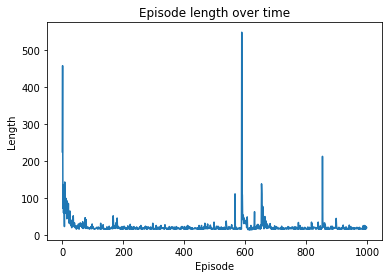

In [ ]:
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

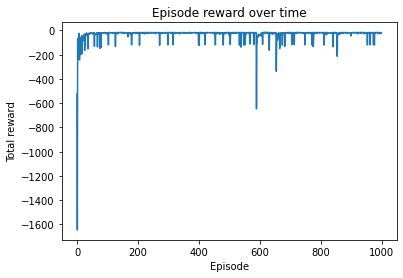

In [ ]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

## DQN

In [15]:
import gym
import torch
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
from IPython import display
torch.manual_seed(14)
from collections import deque
%matplotlib inline
env = gym.envs.make("MountainCar-v0")

In [16]:
def gen_epsilon_greedy_policy(estimator, epsilon, n_action):
    def policy_function(state):
        if random.random() < epsilon:
            return random.randint(0, n_action - 1)
        else:
            q_values = estimator.predict(state)
            return torch.argmax(q_values).item()
    return policy_function

In [17]:
def q_learning(env, estimator, n_episode, gamma=1.0, epsilon=0.1, epsilon_decay=.99):
    """
    Deep Q-Learning using DQN
    @param env: Gym environment
    @param estimator: Estimator object
    @param n_episode: number of episodes
    @param gamma: the discount factor
    @param epsilon: parameter for epsilon_greedy
    @param epsilon_decay: epsilon decreasing factor
    """
    fig = plt.figure()
    for episode in range(n_episode):
        policy = gen_epsilon_greedy_policy(estimator, epsilon, n_action)
        state = env.reset()
        is_done = False
        while not is_done:
            action = policy(state)
            next_state, reward, is_done, _ = env.step(action)
            total_reward_episode[episode] += reward
            modified_reward = next_state[0] + 0.5
            if next_state[0] >= 0.5:
                modified_reward += 100
            elif next_state[0] >= 0.25:
                modified_reward += 20
            elif next_state[0] >= 0.1:
                modified_reward += 15
            elif next_state[0] >= 0:
                modified_reward += 10

            q_values = estimator.predict(state).tolist()

            if is_done:
                q_values[action] = modified_reward
                estimator.update(state, q_values)
                break

            q_values_next = estimator.predict(next_state)
            q_values[action] = modified_reward + gamma * torch.max(q_values_next).item()

            estimator.update(state, q_values)
            state = next_state

        if episode % 50 == 0:
            display.clear_output(wait=True)
            display.display(plt.clf())          
            plt.plot(total_reward_episode)
            plt.title('Episode reward over time')
            plt.xlabel('Episode')
            plt.ylabel('Total reward')
            plt.show()         
            print('Episode: {}, total reward: {}, epsilon:{}'.format(episode, total_reward_episode[episode], epsilon))
        epsilon = max(epsilon * epsilon_decay, 0.01)

In [18]:
class DQN():
    def __init__(self, n_state, n_action, n_hidden=50, lr=0.05):
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(n_state, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_action))
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)

    def update(self, s, y):
        """
        Update the weights of the DQN given a training sample
        @param s: state
        @param y: target value
        """
        y_pred = self.model(torch.Tensor(s))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def predict(self, s):
        """
         Compute the Q values of the state for allactions using the learning model
        @param s: input state
        @return: Q values of the state for all actions
        """
        with torch.no_grad():
            return self.model(torch.Tensor(s))

In [19]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n
n_hidden = 500
lr = 0.001
dqn = DQN(n_state, n_action, n_hidden, lr)

None

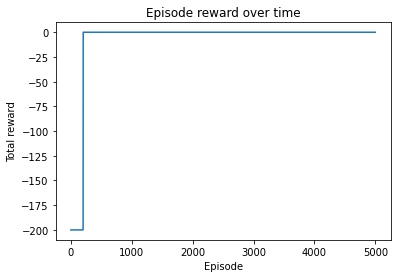

Episode: 200, total reward: -200.0, epsilon:0.13397967485796175


In [ ]:
n_episode = 5000
total_reward_episode = [0] * n_episode
q_learning(env, dqn, n_episode, gamma=.9, epsilon=1)

In [ ]:
plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

## Környezet megjelenítése videorögzítés által

- Mivel a colabban nem lehetséges a gym környezetket valós időben futtatni így a videofájlba generálunk epizódokat. 

In [9]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [10]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 2.0MB 6.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2


In [8]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [9]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [10]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [11]:
env = wrap_env(gym.envs.make("MountainCar-v0")) 

In [13]:
observation = env.reset()

while True:
  
    env.render()
    
    #your agent goes here

    q_values = dqn.predict(observation)
    action = torch.argmax(q_values).item()
    #action = env.action_space.sample() 
         
    observation, reward, done, info = env.step(action) 
   
        
    if done: 
      break;
            
env.close()
show_video()